# 1. Importing Dependencies

In [1]:
pip install tensorflow-gpu==2.9.1 tensorflow==2.9.1 stable-baselines3 gym-anytrading gym

  Using cached tensorflow_gpu-2.9.1-cp38-cp38-win_amd64.whl (444.1 MB)
     -------------------------------------- 444.1/444.1 MB 2.2 MB/s eta 0:00:00
  Using cached stable_baselines3-1.5.0-py3-none-any.whl (177 kB)
     ------------------------------------ 172.0/172.0 kB 369.2 kB/s eta 0:00:00
  Using cached gym-0.24.1-py3-none-any.whl
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached absl_py-1.1.0-py3-none-any.whl (123 kB)
     ---------------------------------------- 2.6/2.6 MB 2.6 MB/s eta 0:00:00
  Using cached typing_extensions-4.2.0-py3-none-any.whl (24 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached grpcio-1.47.0-cp38-cp38-win_amd64.whl (3.6 MB)
  Using cached flatbuffers-1.12-py2.py3-none-a

In [2]:
import gym
import gym_anytrading

from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 2. Bring in Marketwatch GME Data

In [3]:
df = pd.read_csv('data/gmedata.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume
0,06/24/2022,143.00,148.37,131.53,135.21,"4,248,941"
1,06/23/2022,141.64,143.99,136.73,142.02,"1,670,725"
2,06/22/2022,138.67,144.73,136.43,138.46,"1,961,729"
3,06/21/2022,138.22,145.40,135.52,140.28,"3,128,067"
4,06/17/2022,126.86,135.86,126.32,135.14,"3,085,227"


In [7]:
# Convert Date column datatype
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [8]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-24,143.00,148.37,131.53,135.21,"4,248,941"
2022-06-23,141.64,143.99,136.73,142.02,"1,670,725"
2022-06-22,138.67,144.73,136.43,138.46,"1,961,729"
2022-06-21,138.22,145.40,135.52,140.28,"3,128,067"
2022-06-17,126.86,135.86,126.32,135.14,"3,085,227"


In [29]:
env = gym.make('stocks-v0', df=df, frame_bound=(10, 200), window_size=5)

In [30]:
env.signal_features

array([[ 1.2573e+02,  0.0000e+00],
       [ 1.2929e+02,  3.5600e+00],
       [ 1.2617e+02, -3.1200e+00],
       [ 1.1825e+02, -7.9200e+00],
       [ 1.2909e+02,  1.0840e+01],
       [ 1.2898e+02, -1.1000e-01],
       [ 1.3873e+02,  9.7500e+00],
       [ 1.4650e+02,  7.7700e+00],
       [ 1.2810e+02, -1.8400e+01],
       [ 1.3370e+02,  5.6000e+00],
       [ 1.3400e+02,  3.0000e-01],
       [ 1.2140e+02, -1.2600e+01],
       [ 1.2474e+02,  3.3400e+00],
       [ 1.3721e+02,  1.2470e+01],
       [ 1.2846e+02, -8.7500e+00],
       [ 1.1517e+02, -1.3290e+01],
       [ 8.9150e+01, -2.6020e+01],
       [ 9.6130e+01,  6.9800e+00],
       [ 9.5660e+01, -4.7000e-01],
       [ 9.9190e+01,  3.5300e+00],
       [ 9.1480e+01, -7.7100e+00],
       [ 1.0038e+02,  8.9000e+00],
       [ 9.1800e+01, -8.5800e+00],
       [ 9.8390e+01,  6.5900e+00],
       [ 8.9570e+01, -8.8200e+00],
       [ 8.1330e+01, -8.2400e+00],
       [ 9.3500e+01,  1.2170e+01],
       [ 9.8790e+01,  5.2900e+00],
       [ 1.1470e+02,

# 3. Build Environment

In [31]:
# 2 actions, BUY & SELL
env.action_space

Discrete(2)

info {'total_reward': -56.36999999999995, 'total_profit': 0.39446309601026264, 'position': 0}


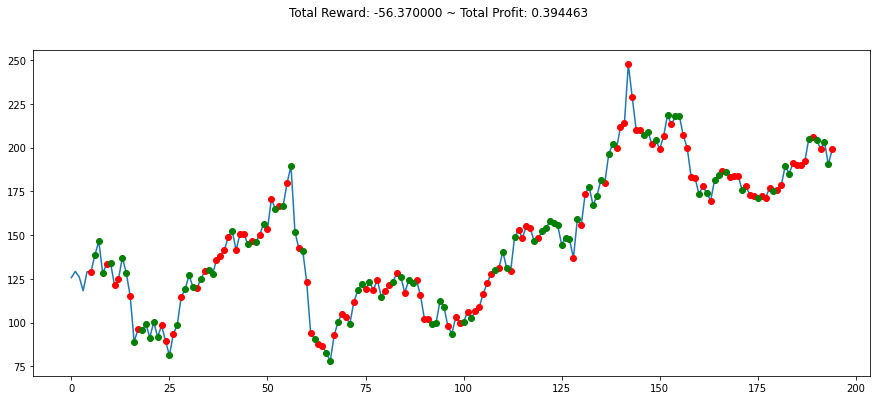

In [32]:
state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break
plt.figure(figsize=(15, 6))
plt.cla()
env.render_all()
plt.show()

# 4. Building Environment and Training

In [33]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(10, 200), window_size=5)
env = DummyVecEnv([env_maker])

In [35]:
model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=100000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 1138     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.673   |
|    explained_variance | 0.0216   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.778   |
|    value_loss         | 2.33     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1173     |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.683   |
|    explained_variance | -0.168   |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 8.69     |
|    value_loss      

# 5. Evaluation

In [45]:
env = gym.make('stocks-v0', df=df, frame_bound=(180, 300), window_size=5)
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _ = model.predict(obs)
    obs, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 27.239999999999952, 'total_profit': 0.9485796354118368, 'position': 1}


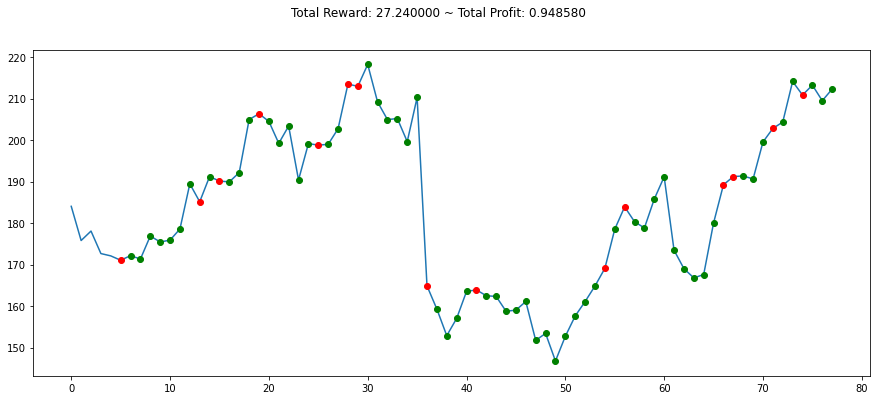

In [46]:
plt.figure(figsize=(15, 6))
plt.cla()
env.render_all()
plt.show()